# Cristina Venturini 2022461

## Assignment 5

In [1]:
library(tibble)
library(ggplot2)
library(latex2exp)
library(glue)
theme_set(theme_bw())
library(viridis)
library(patchwork)

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'latex2exp' was built under R version 3.6.3"Warning message:
"package 'viridis' was built under R version 3.6.3"Loading required package: viridisLite
Warning message:
"package 'viridisLite' was built under R version 3.6.3"Warning message:
"package 'patchwork' was built under R version 3.6.3"

## Exercise 1

A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of $150$ interviewed people, $29$ have read the last issue of the journal.
1. What kind of distribution would you assume for $y$, the number of people that have seen the last issue of the journal?
2. Assuming a uniform prior, what is the posterior distribution for $y$?
3. Plot both posterior and likelihood ditributions functions.

### 1.1

I would assume a binomial distribution with $n=150$ and $r=29$. The likelihood distribution is $P(r|p,n,M) = {n \choose r}\times p^r \times (1-p)^r$

$$P(p|r,n,M) = \frac{P(r|p,n,M) \times P(p|M)}{P(r|n,M)}$$

### 1.2

Assuming a uniform prior, the posterior will simply be proportional to the likelihood, with a normalization factor Z (the denominator in the above equation, the "evidence"). 

$$P(p|r,n,m) = \frac{{n \choose r}\times p^r \times (1-p)^r}{Z} = \frac{P^*(p|r,n,m)}{Z} $$

where $P^*$ is the un-normalized posterior distribution.

### 1.3

In [2]:
n = 150
r = 29
n.sample = 2000
delta.p = 1/n.sample

p = seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
pr = dunif(p)/sum(delta.p*sum(dunif(p))) # prior
lh = dbinom(x=r, size=n, prob=p)/(delta.p*sum(dbinom(x=r, size=n, prob=p))) # likelihood 
pt = (lh*pr)/sum(delta.p*sum(lh*pr)) # posterior 

In [3]:
y = c(lh, pt)
factor = rep(c('Likelihood', 'Posterior'), each=2000)
p = rep(p, times=2)

In [4]:
plot_1 = tibble('y' = y, 'factor' = factor, 'p' = p)

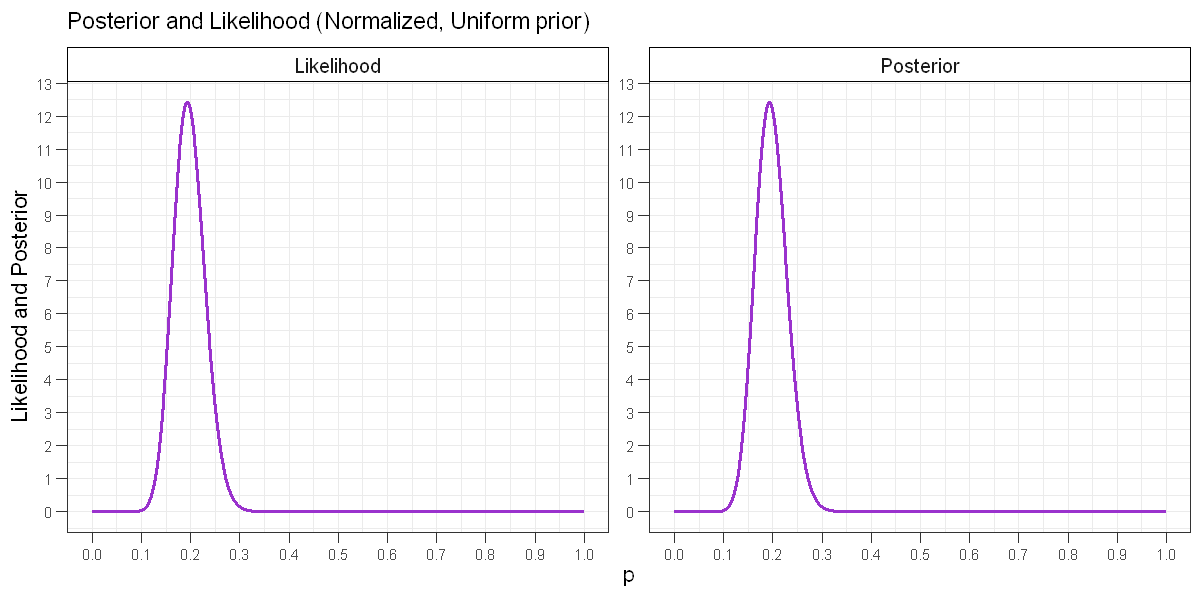

In [5]:
options(repr.plot.width=10, repr.plot.height=5)
plot = ggplot(plot_1) + 
        geom_line(aes(p, y), colour = 'darkorchid3', size=1)+
        labs(title=TeX('Posterior and Likelihood (Normalized, Uniform prior)'), 
             x=TeX('p'), y=TeX('Likelihood and Posterior'))+ 
        scale_x_continuous(breaks = scales::pretty_breaks(n = 10))+
        scale_y_continuous(breaks = scales::pretty_breaks(n = 10))+
        theme(plot.title = element_text(color="black", size=14, face="bold.italic"), 
              axis.title.x = element_text(color="black", size=13),
              axis.title.y = element_text(color="black", size=13), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))
plot + facet_wrap(. ~ factor, scales='free', ncol=2)+ theme(strip.text.x = element_text(size=12),
                        strip.background = element_rect(colour="black", fill="white", size=0.5, linetype="solid"))

Both likelihood (for visualization purposes) and posterior are normalized.

## Exercise 2

Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.
+ Anna thinks that her prior is a beta distribution with mean $0.2$ and a standard deviation of $0.08$.
+ Benny moved only recently to this new town and therefore he does non have the slightest idea about it. Therefore he decides to use a uniform prior.
+ Chris believes that his prior should have a trapezoidal shape of the form
$$f(x)=\begin{cases}
      20x & 0 \leq x < 0.1 \\
      2 & 0.1 \leq x < 0.3 \\
      5-10x & 0.3 \leq x < 0.5 \\
      0 & x \geq 0.5
   \end{cases}$$
1. Draw and compare the three prior distributions.

The next day the three students decide to interview a sample of $100$ citizens of the small town, asking for their opinion. Out of the interviewed sample, $26$ support the building of the new concert hall.

2. Evaluate and draw the three posterior distributions.<br>
3. Give an estimate of the most probable value and the $95\%$ credibility interval.


### 2.1

In [6]:
# Beta prior

# alpha and beta come from the appropriate calculations present in the slides and performed during the lecture, for 
# brevity I didn't report them here
alpha = 4.8
beta = 19.2
n.sample = 2000; delta.p = 1/n.sample
p = seq(from=1/(2*n.sample),by=1/n.sample, length.out=n.sample)

beta_pr = dbeta(p, alpha, beta)/(delta.p*sum(dbeta(p, alpha, beta)))

# Uniform prior 

unif_pr = dunif(p)/(delta.p*sum(dunif(p)))

# Trapezoidal prior
dtrap = function(x){
    pdf = ifelse(0<=x & x<0.1, 20*x, ifelse(0.1<=x & x<0.3, 2, ifelse(0.3<=x & x<0.5, 5-10*x, 0)))
    return(pdf)    
    }
    
trap_pr = dtrap(p)/(delta.p*sum(dtrap(p)))

In [7]:
priors = c(beta_pr, unif_pr, trap_pr)
p_plot = rep(p, times=3)
factor = rep(c('Beta prior','Uniform prior','Trapezoidal prior'), each=2000)
priors_tb = tibble('priors' = priors, 'p' = p_plot, 'Priors' = factor)

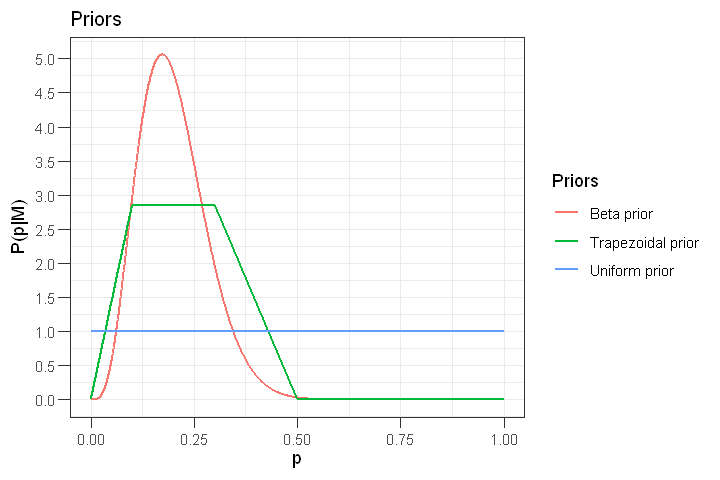

In [8]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(priors_tb) + geom_line(aes(p, priors, group = Priors, colour=Priors), size = 0.8) +
scale_y_continuous(name = TeX("$P(p|M)$"), breaks = scales::pretty_breaks(n = 8))+
labs(title=TeX('Priors'), 
     x=TeX('p'))+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))

### 2.2

The likelihood is given by the binomial distribution with $n=100$ and $r=26$. <br>

For the posterior Beta distribution we have a Beta distribution with $\alpha=\alpha+r$ and $\beta=\beta+n-r$. <br>
For the posterior Uniform distribution we have the corresponding likelihood. This is a binomial distribution with $n=100$ and $r=26$, with a normalization factor. <br>
For the posterior Trapezoidal distribution we have a distribution given by the product of the likelihood with the prior. <br>

In [9]:
n = 100
r = 26

# likelihood

lh = dbinom(x=r, size=n, prob=p)

# Posterior for Beta prior

beta_pt = dbeta(x=p, alpha+r,beta+n-r)
beta_pt_norm = beta_pt/(delta.p*sum(beta_pt))

# Posterior for Uniform prior

unif_pt_norm = lh*unif_pr/(delta.p*sum(lh*unif_pr))

# Posterior for Trapezoidal prior

trap_pt_norm = (lh*trap_pr)/(delta.p*sum(lh*trap_pr))

In [10]:
posteriors = c(beta_pt_norm, unif_pt_norm, trap_pt_norm)
factor_pt = rep(c('Beta posterior','Uniform posterior','Trapezoidal posterior'), each=2000)
posteriors_tb = tibble('posteriors' = posteriors, 'p' = p_plot, 'Posteriors' = factor_pt)

Warning message:
"Removed 3900 row(s) containing missing values (geom_path)."

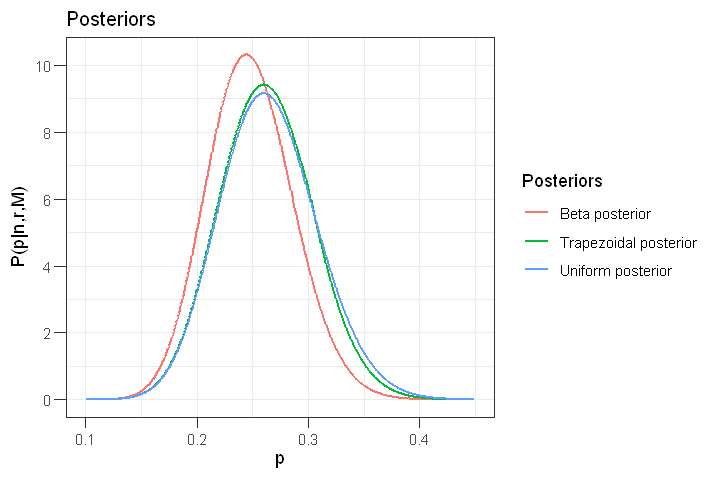

In [11]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(posteriors_tb) + geom_line(aes(p, posteriors, group = Posteriors, colour=Posteriors), size = 0.8) +
scale_y_continuous(name = TeX("$P(p|n,r,M)$"), breaks = scales::pretty_breaks(n = 8))+
labs(title=TeX('Posteriors'), 
     x=TeX('p'))+
xlim(0.1,0.45)+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))

One can clearly see that even starting from sensibly different priors, the posteriors distribution are quite similar. 

### 2.3

For the Beta posterior: <br>
- for the credibility interval, it is sufficient to use the appropriate function in R
- for the most probable value, i.e. the maximum of the posterior distribution, one can make explicit calculations or simply take the posterior maximum 

In [12]:
beta_ci = qbeta(c(0.025,0.975), alpha+r, beta+n-r)
p0_th = (r+alpha-1)/(n+alpha+beta-2)
p0_ex = p[which(beta_pt>=max(beta_pt)[1])]

In [13]:
cat('Beta Posterior')
cat('\nMost probable value from theory:',round(p0_th,4), 'and from computation:', round(p0_ex,4))
cat('\n95% Credibility interval:',round(beta_ci[1],4),'-',round(beta_ci[2],4))

Beta Posterior
Most probable value from theory: 0.2443 and from computation: 0.2442
95% Credibility interval: 0.1767 - 0.3278

For generic distributions, we need to find the credibility interval by integration

In [14]:
unif_pt = function(p){
    dbeta(x=p, r+1, n-r+1)
}

trap_pt = function(p){
    dbeta(x=p, r+1, n-r+1)*dtrap(p)
}

p = seq(0,1,0.001)

In [15]:
# function to find the max of the posterior distribution

find_max = function(pd){
    return(p[which(pd>=max(pd)[1])])
}

#function to find the value to subtract(sum) from(to) the previously found max in order to obtain the credibility interval

find_k = function(ci, max){
    return(uniroot(function(k) integrate(unif_pt, lower=max-k, upper=max+k)$value - ci, c(0,1))$root)
}                   
                   
estimate = function(post){
    post_dtr = post(p)
    p0 = find_max(post_dtr)
    low_lim = p0-find_k(0.95, p0)
    up_lim = p0+find_k(0.95, p0)
    return(c(p0,low_lim,up_lim))
}

In [16]:
u = estimate(unif_pt)
t = estimate(trap_pt)

In [17]:
cat('Uniform Posterior')
cat('\nMost probable value:',round(u[1],4))
cat('\n95% Credibility interval:',round(u[2],4),'-',round(u[3],4))
cat('\nTrapezoidal Posterior')
cat('\nMost probable value:',round(t[1],4))
cat('\n95% Credibility interval:',round(t[2],4),'-',round(t[3],4))

Uniform Posterior
Most probable value: 0.26
95% Credibility interval: 0.1744 - 0.3456
Trapezoidal Posterior
Most probable value: 0.26
95% Credibility interval: 0.1744 - 0.3456

## Exercise 3

A coin is flipped $n = 30$ times with the following outcomes:

`T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H`
1. Assuming a flat prior and a beta prior, plot the likelihood, prior and posterior distributions for the dataset.
2. Evaluate the most probable value for the coin probability $p$ and, integrating the posterior probability distribution, give an estimate for a $95\%$ credibility interval.
3. Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from $1$ to $30$).
4. Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

### 3.1

In [18]:
n = 30 # number of trials
r = 15 # number of heads

delta.p = 0.0001
p = seq(0, 1, delta.p)
lh = dbinom(x=r, size=n, prob=p) # binomial likelihood

# uniform prior

unif_pr = dunif(p) # prior
unif_pt = lh/(delta.p*sum(lh)) # posterior 

# beta prior

alpha = 3; beta = 9
beta_pr = dbeta(p, alpha, beta) # prior
beta_pt = dbeta(x=p, alpha+r,beta+n-r)/(delta.p*sum(dbeta(x=p, alpha+r,beta+n-r))) # posterior 

In [19]:
pr = c(beta_pr, unif_pr)
pt = c(beta_pt, unif_pt)
lh_plot = rep(lh, times = 2)
p_plot = rep(p, times=2)
factor = rep(c('Beta prior','Uniform prior'), each=length(p))
plots_tb = tibble('pr' = pr, 'pt' = pt, 'lh' = lh_plot, 'p' = p_plot, 'Prior' = factor)

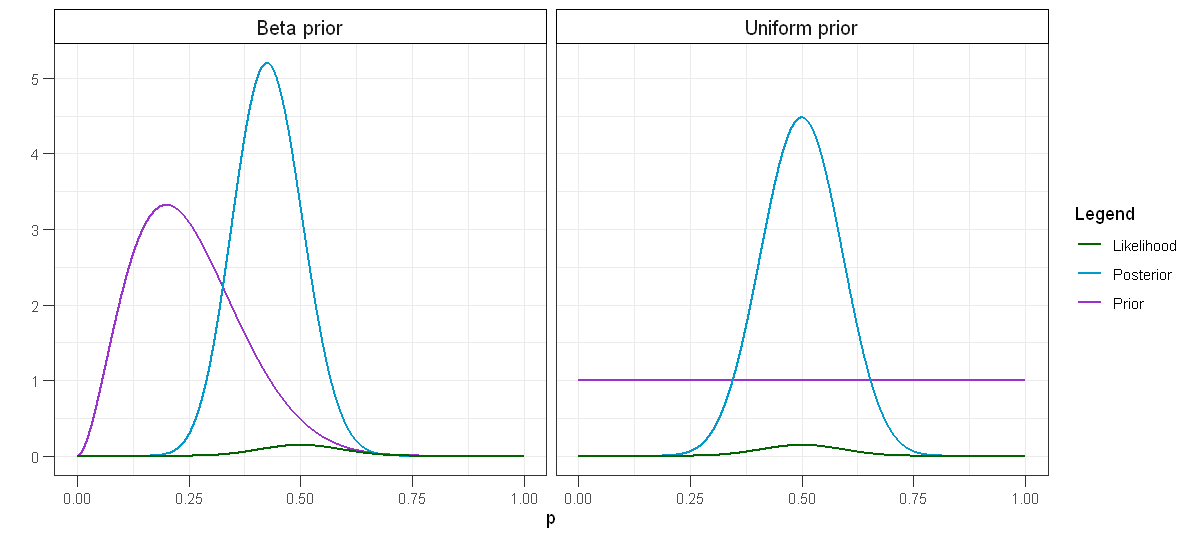

In [20]:
options(repr.plot.width=10, repr.plot.height=4.5)
plot = ggplot(plots_tb) + 
geom_line(aes(p, pr, colour='Prior'), size = 0.8) +
geom_line(aes(p, pt, colour='Posterior'), size = 0.8) +
geom_line(aes(p, lh, colour='Likelihood'), size = 0.8) +
scale_color_manual(values = c('Prior' = 'darkorchid3','Posterior' = 'deepskyblue3', 'Likelihood' = 'darkgreen'))+
scale_y_continuous(breaks = scales::pretty_breaks(n = 8))+
labs(x=TeX('p'), color = 'Legend', y = '')+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))
plot + facet_wrap(. ~ Prior, ncol=2)+ theme(strip.text.x = element_text(size=12),
                        strip.background = element_rect(colour="black", fill="white", size=0.5, linetype="solid"))

Even when using a beta prior particularly distant from the expected max value of the posterior, the results for the posterior distributions don't differ quite as much.

### 3.2

In [21]:
p = seq(0,1,0.0001)

unif_pt = function(p){
    dbeta(x=p, r+1, n-r+1)
}

beta_pt = function(p){
    dbeta(x=p, r+alpha, n-r+beta)
}

In [22]:
u = estimate(unif_pt)
b = estimate(beta_pt)

In [23]:
cat('Uniform Posterior')
cat('\nMost probable value:',round(u[1],4))
cat('\n95% Credibility interval:',round(u[2],4),'-',round(u[3],4))
cat('\nBeta Posterior')
cat('\nMost probable value:',round(b[1],4))
cat('\n95% Credibility interval:',round(b[2],4),'-',round(b[3],4))

Uniform Posterior
Most probable value: 0.5
95% Credibility interval: 0.3306 - 0.6694
Beta Posterior
Most probable value: 0.425
95% Credibility interval: 0.2065 - 0.6435

### 3.3

In [24]:
r = 0 # initializing r
trials = c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H',
              'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H','H', 'H')
delta.p = 0.0001
p = seq(0, 1, delta.p)

unif_low_lim = c() 
unif_up_lim = c()
unif_p0 = c()

beta_low_lim = c() 
beta_up_lim = c()
beta_p0 = c()

upt = matrix(, nrow = 10001, ncol = 30)
bpt = matrix(, nrow = 10001, ncol = 30)
r_list = c()

In [25]:
alpha = 4
beta = 9
for (n in 1:30){
    if(trials[n]=='H'){
        r = r+1
    }
    
    r_list = append(r_list,r)
    # Evolution of posterior unif
    # The prior is uniform and so there is only dbinom term as p.star(unnormalized)
    # un-normalized posterior unif
    upt_norm = dbinom(x=r, size=n, prob=p)/(delta.p*sum(dbinom(x=r, size=n, prob=p))) # normalized posterior distribution
    upt[,n] = upt_norm
    upt_func = function(p){
        dbeta(x=p, r+1, n-r+1)
    }
    
    u = estimate(upt_func)
    unif_low_lim = append(unif_low_lim, u[2])
    unif_up_lim = append(unif_up_lim, u[3])
    unif_p0 = append(unif_p0, u[1])
    
    bpt_norm = dbeta(x=p, alpha+r,beta+n-r)/(delta.p*sum(dbeta(x=p, alpha+r,beta+n-r))) # posterior normalized 
    bpt[,n] = bpt_norm
    bpt_func = function(p){
        dbeta(x=p, alpha+r, beta+n-r)
    }
    
    b = estimate(bpt_func)
    beta_low_lim = append(beta_low_lim, b[2])
    beta_up_lim = append(beta_up_lim, b[3])
    beta_p0 = append(beta_p0, b[1])
    
}

Here, we plot the obtained results, the corresponding values of $r$ are printed in the titles. In red we have the beta posterior and in black the uniform one. The dashed lines, red and black respectively, indicate the credibility intervals. 

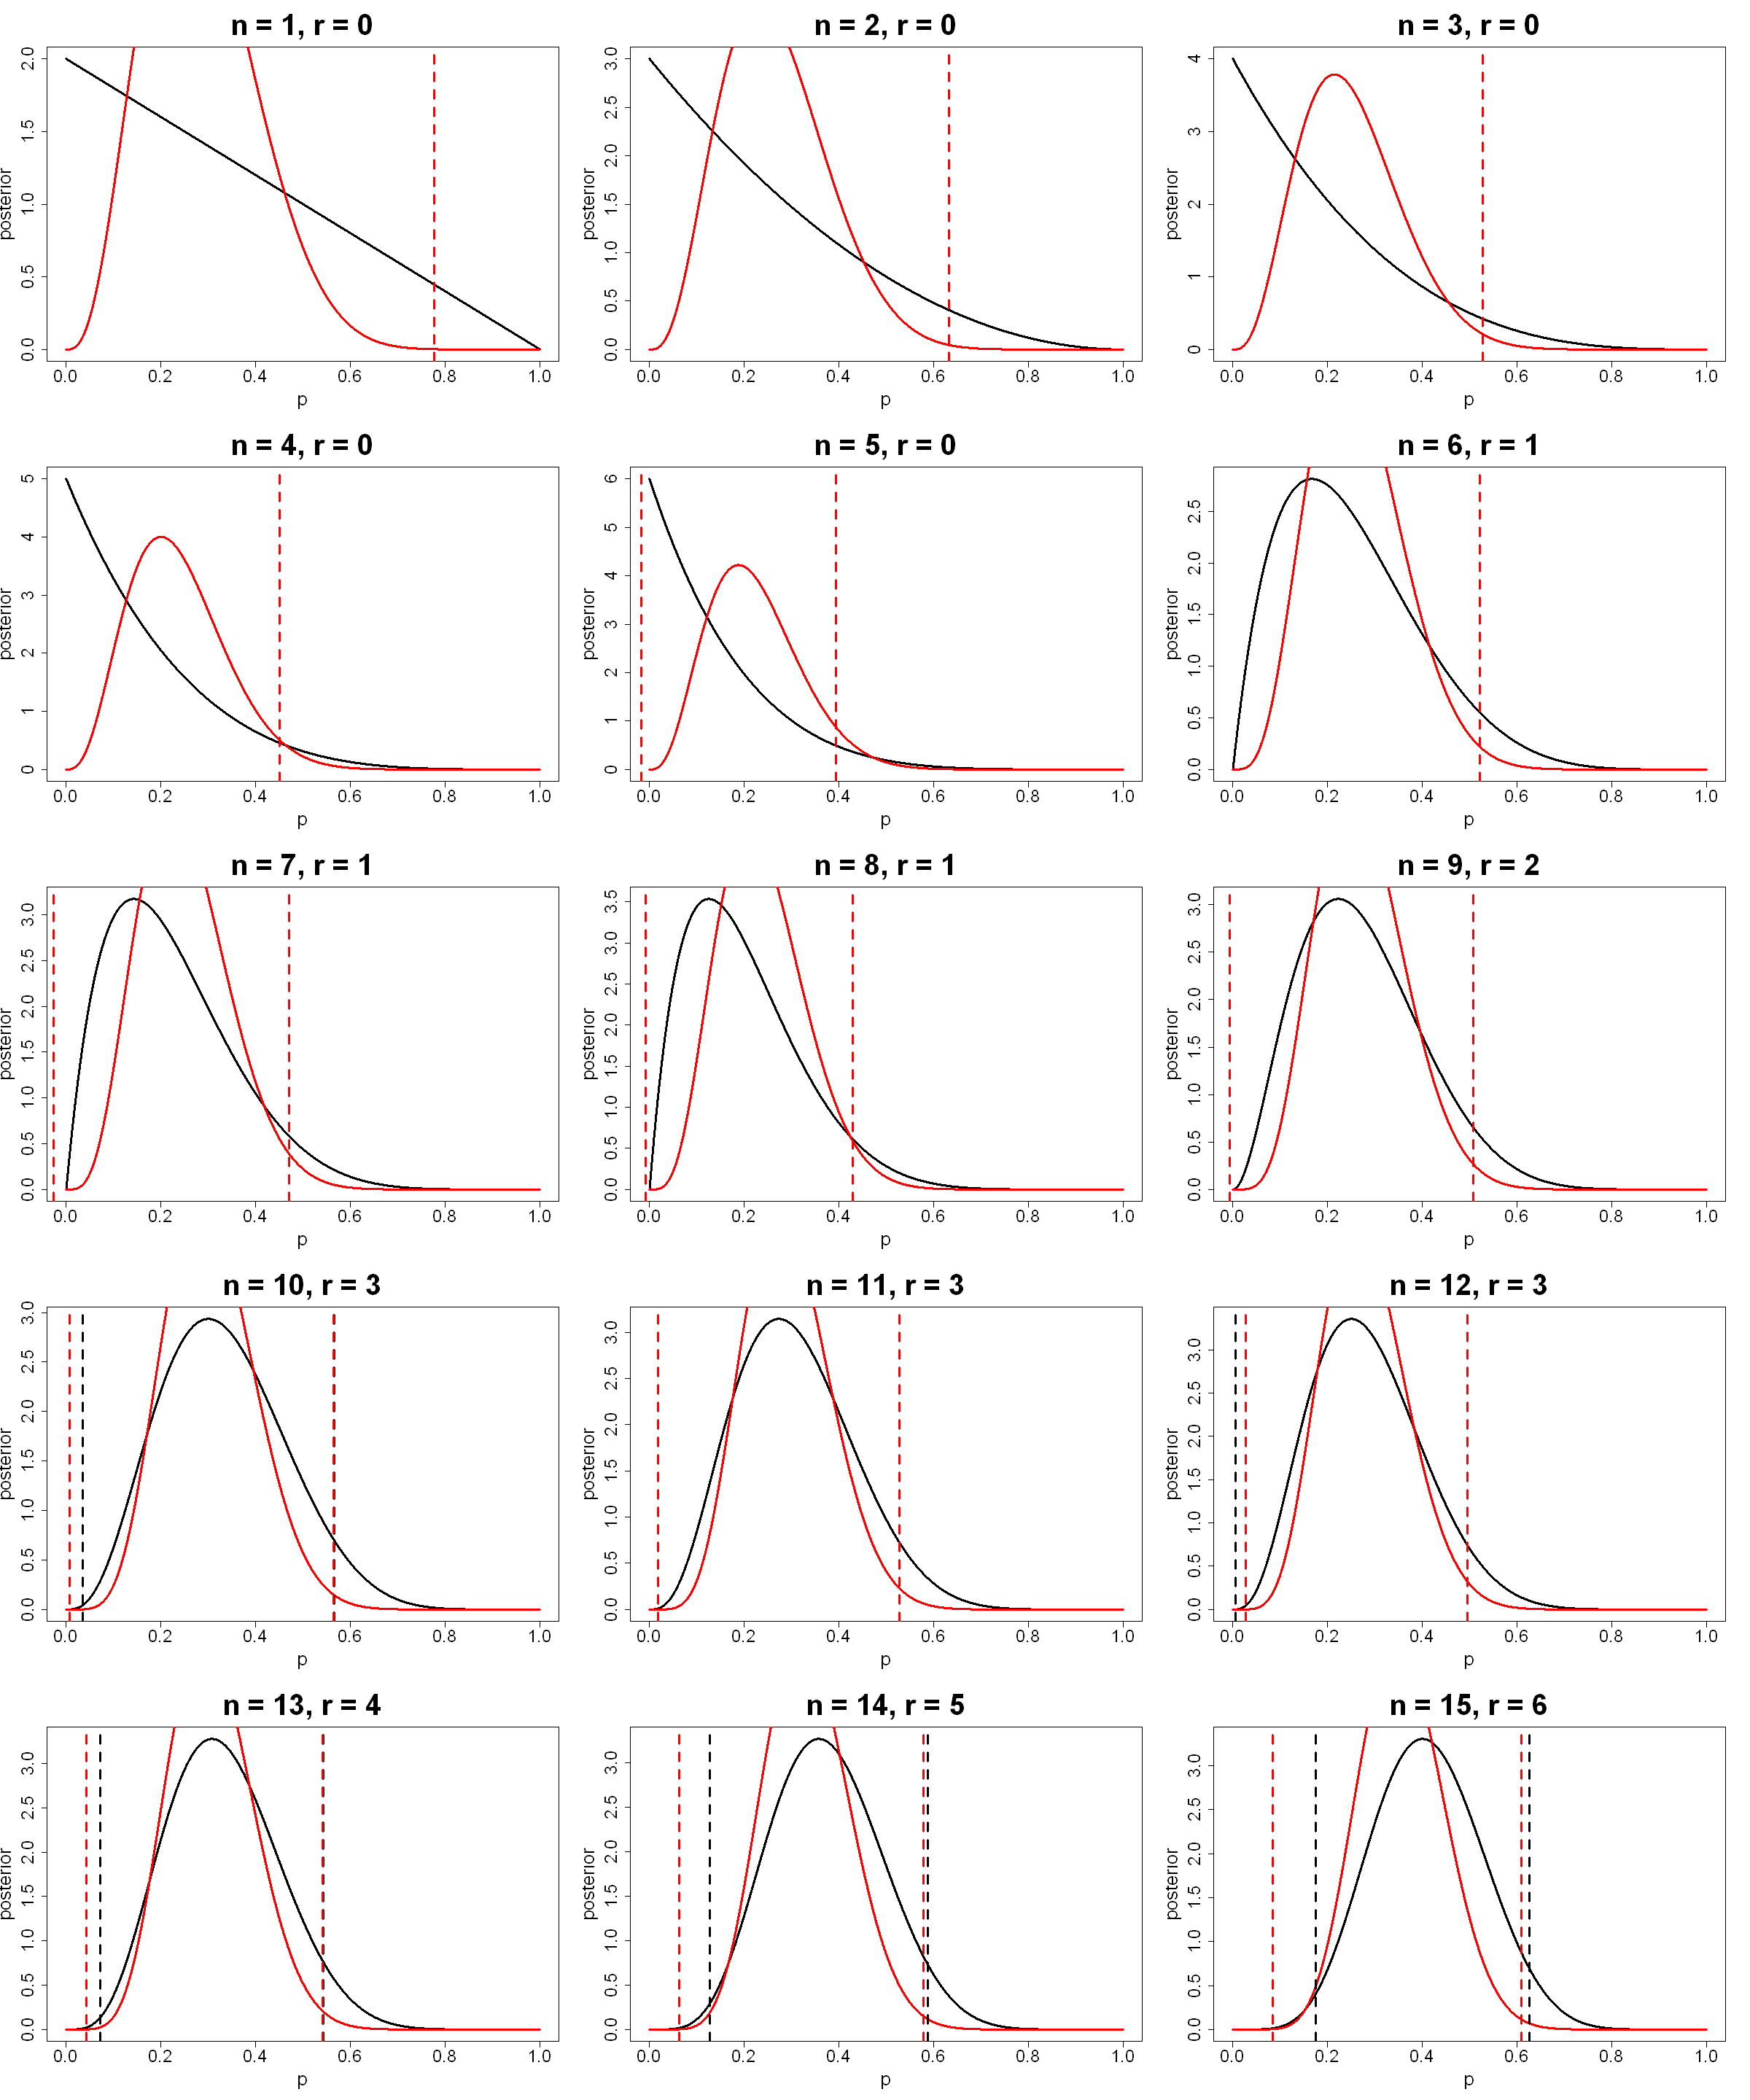

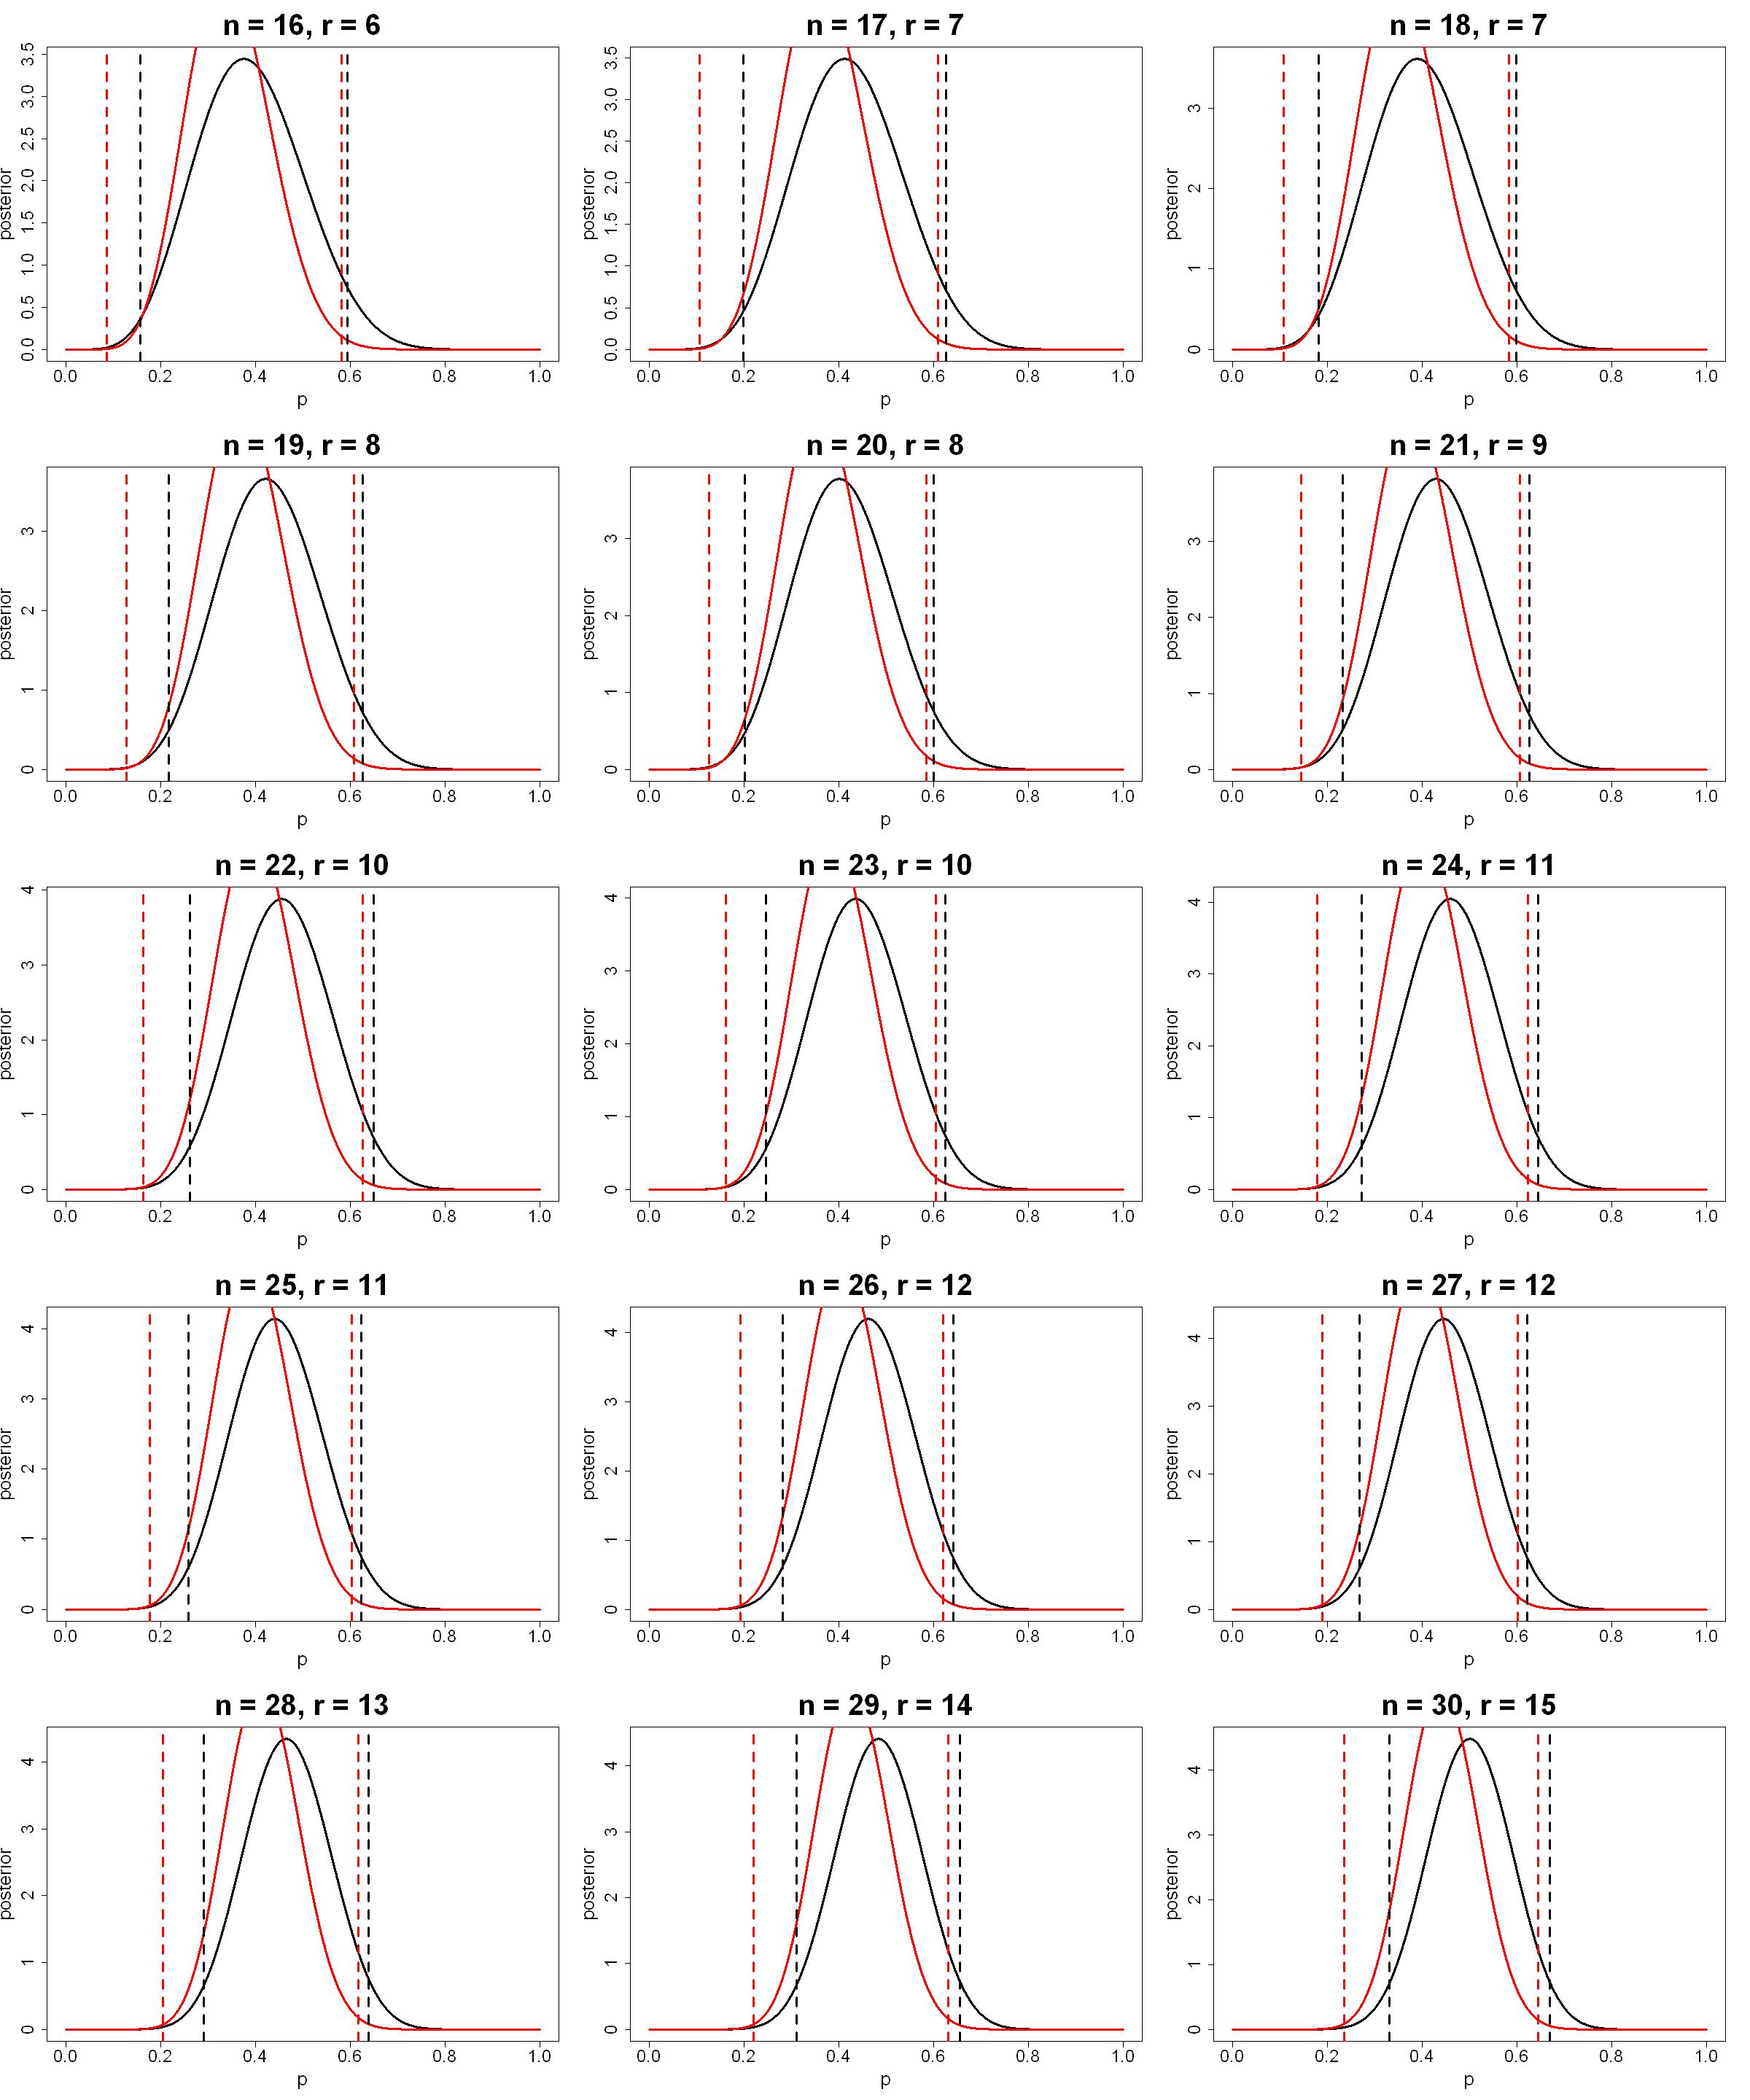

In [26]:
options(repr.plot.width=20, repr.plot.height=24)
par(mfrow=c(5,3))
lista = 1:30 #c(1,2,4,7,10,13,16,19,22,25,28,30)
for (i in lista){
    plot(p, upt[,i], type='l', main=glue("n = {i}, r = {r_list[i]}"), xlab="p", ylab="posterior", cex.main=3, cex.lab=2, 
         lwd=3, col="black", cex.axis=1.8)
    lines(p, bpt[,i], col='red', lwd=3)
    abline(v = unif_low_lim[i], col="black", lwd=3, lty=2)
    abline(v = unif_up_lim[i], col="black", lwd=3, lty=2)
    abline(v = beta_low_lim[i], col="red", lwd=3, lty=2)
    abline(v = beta_up_lim[i], col="red", lwd=3, lty=2)
}


I now make a graph of how the credibility intervals and the maximum value change according to the number of coin tosses. <br>
We can see in the plot below how the most probable value slowly shifts towards $0.5$.


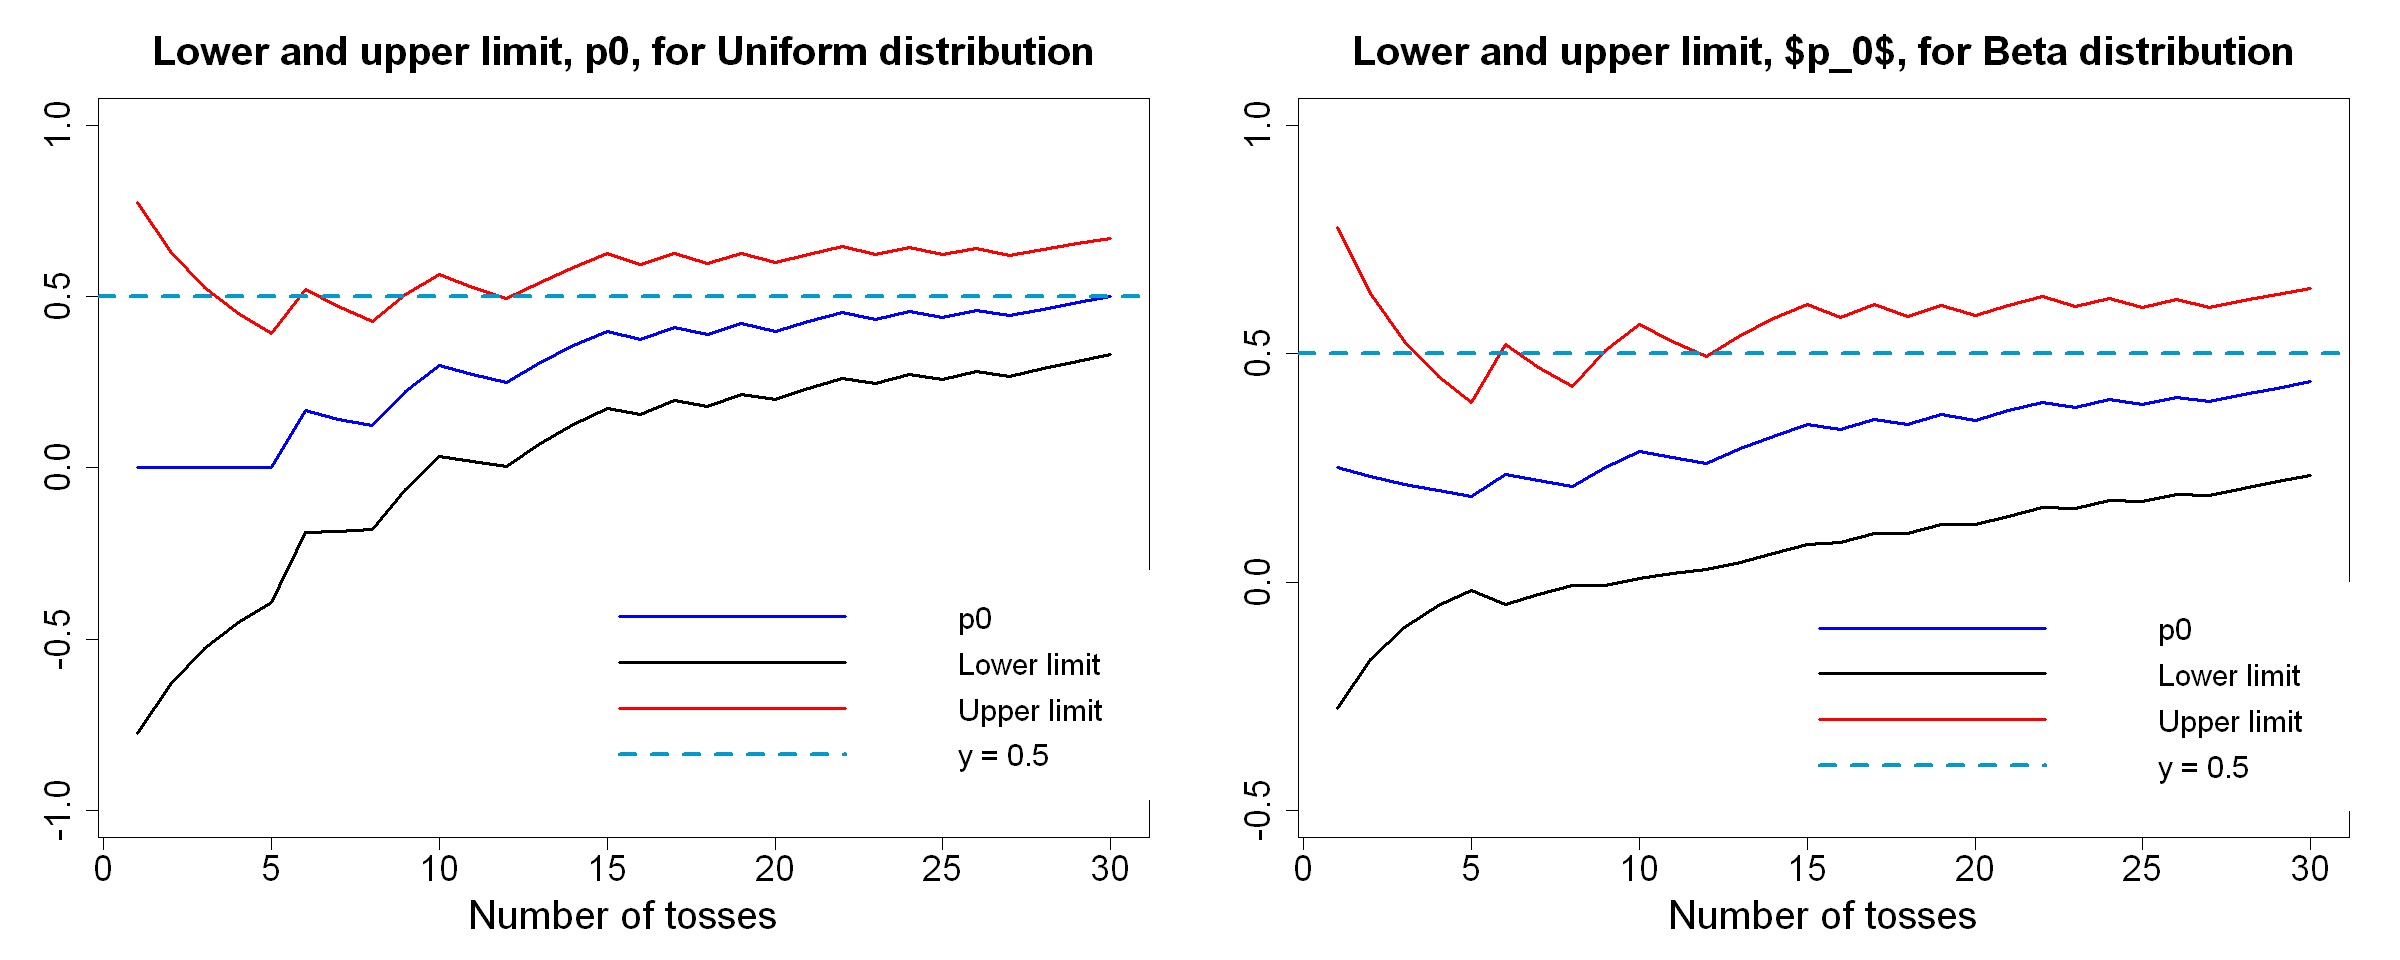

In [27]:
options(repr.plot.width=20, repr.plot.height=8)
par(mfrow=c(1,2))
plot(1:30, unif_low_lim, type='l', main=glue("Lower and upper limit, p0, for Uniform distribution"), 
     xlab="Number of tosses", ylab="", cex.main=2, cex.lab=2, 
         lwd=3, col="black", cex.axis=1.8,ylim=c(-1,1))
lines(1:30, unif_up_lim, col='red', lwd=3)
lines(1:30, unif_p0, col='blue', lwd=3)
abline(h=0.5, col="deepskyblue3", lty=2, lwd=3.5)
legend(12, -0.3, legend=c("p0","Lower limit","Upper limit",'y = 0.5'),
        col=c("blue","black","red","deepskyblue3"), lty = c(1,1,1,2), cex=1.5, box.lty = 0, lwd = c(3,3,3,3.5))

plot(1:30, beta_low_lim, type='l', main=glue("Lower and upper limit, $p_0$, for Beta distribution"), 
     xlab="Number of tosses", ylab="", cex.main=2, cex.lab=2, 
         lwd=3, col="black", cex.axis=1.8,ylim=c(-0.5,1))
lines(1:30, beta_up_lim, col='red', lwd=3)
lines(1:30, beta_p0, col='blue', lwd=3)
abline(h=0.5, col="deepskyblue3", lty=2, lwd=3.5)
legend(12,0, legend=c("p0","Lower limit","Upper limit",'y = 0.5'),
        col=c("blue","black","red","deepskyblue3"), lty = c(1,1,1,2), lwd = c(3,3,3,3.5), cex=1.5, box.lty=0)


### 3.4

There is no difference in result when analyzing the data sequentially or when finding the posterior distribution as a whole. <br>
The graph of question number $1$ and the last graph of question $3$ give the same result. If anything, analyzing the data sequentially helps to better understand how the credibility intervals and the peaks of the posteriors change over the number of tosses.